In [32]:

# Mobile Price Prediction using Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
import joblib

In [33]:
dementiaData= pd.read_csv('data/dementia.csv')

In [34]:
dementiaData.shape

(1000, 24)

In [35]:
dementiaData.head(2)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1


In [36]:
# prompt: from dementiaData dataframe remove "Prescription" and "Dosage in mg" columns

data1=dementiaData.drop(columns=['Prescription', 'Dosage in mg'])


In [37]:
data1.head(2)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,Primary School,Left,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,Secondary School,Right,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1


In [38]:
# prompt: I want to encode value from column "Education_Level" since the values into that column are string

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1['Education_Level'] = encoder.fit_transform(data1['Education_Level'])


In [39]:
data1.head(2)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,2,Left,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,3,Right,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1


In [40]:
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'Diploma/Degree': 0, 'No School': 1, 'Primary School': 2, 'Secondary School': 3}


In [41]:
# prompt: I also want want to encode the following columns: "Dominant_Hand","Gender","Family_History","Smoking_Status","APOE_ε4","Physical_Activity","Depression_Status","Medication_History","Nutrition_Diet","Sleep_Quality","Chronic_Health_Conditions"

data1['Dominant_Hand'] = encoder.fit_transform(data1['Dominant_Hand'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Gender'] = encoder.fit_transform(data1['Gender'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Family_History'] = encoder.fit_transform(data1['Family_History'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Smoking_Status'] = encoder.fit_transform(data1['Smoking_Status'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['APOE_ε4'] = encoder.fit_transform(data1['APOE_ε4'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Physical_Activity'] = encoder.fit_transform(data1['Physical_Activity'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Depression_Status'] = encoder.fit_transform(data1['Depression_Status'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Medication_History'] = encoder.fit_transform(data1['Medication_History'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Nutrition_Diet'] = encoder.fit_transform(data1['Nutrition_Diet'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Sleep_Quality'] = encoder.fit_transform(data1['Sleep_Quality'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1['Chronic_Health_Conditions'] = encoder.fit_transform(data1['Chronic_Health_Conditions'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

data1.head(2)


{'Left': 0, 'Right': 1}
{'Female': 0, 'Male': 1}
{'No': 0, 'Yes': 1}
{'Current Smoker': 0, 'Former Smoker': 1, 'Never Smoked': 2}
{'Negative': 0, 'Positive': 1}
{'Mild Activity': 0, 'Moderate Activity': 1, 'Sedentary': 2}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'Balanced Diet': 0, 'Low-Carb Diet': 1, 'Mediterranean Diet': 2}
{'Good': 0, 'Poor': 1}
{'Diabetes': 0, 'Heart Disease': 1, 'Hypertension': 2, nan: 3}


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,2,0,...,0,0,2,0,10,0,1,1,0,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,3,1,...,1,1,1,0,1,1,1,1,1,1


In [44]:
data1.shape

(1000, 22)

In [42]:
X=data1.drop(columns=['Dementia'])

In [43]:
Y=data1['Dementia']

In [ ]:
X.shape, Y.shape

((1000, 21), (1000,))

In [45]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.1,stratify=Y,random_state=2)

In [46]:
model= LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [50]:

# lets make predictions and determine our model accuracy
y_pred = model.predict (x_test)
mean_abl_err = mean_absolute_error(y_test, y_pred)
print(mean_abl_err)

mean_sq_err = np.sqrt(mean_absolute_error(y_test, y_pred))
print(mean_sq_err)
# percentage score
print(model.score( x_test, y_test)*100)

0.20083893653067256
0.44815057350255905
76.62670305254065


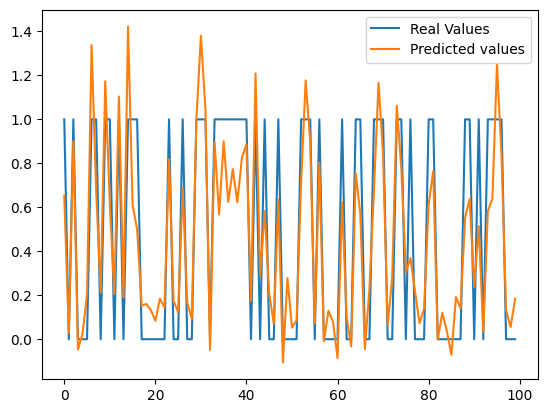

In [51]:
# Visualising the charts of my data and prediction
y_test_values = y_test.values.flatten()

plt.plot(y_test_values, label="Real Values")
plt.plot(y_pred, label='Predicted values')
plt.legend()
plt.show()


In [52]:
# Saving the model
joblib.dump(model,'dementia.joblib')

['dementia.joblib']